In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame as DF
from sympy import diff
from sympy.abc import x,y
from sympy import cos
from sympy import *
from sympy import lambdify
from itertools import product
import random
from scipy.linalg import norm
import re

**Define path.**

In [2]:
# Defining path to folder raw data is saved in
path = "C:/Users/robtk/OneDrive/Desktop/DIAS Internship/Raw data/Harmonic oscillator warm up/"

### Set display of pandas dataframes and Series to 11 decimal places

In [3]:
pd.set_option("display.precision", 11)

**Read in the outputs for 2 2x2 matrices**

In [4]:
X2_by_2 = pd.read_pickle(path+"X.pkl")
V2_by_2 = pd.read_pickle(path+"V.pkl")

X2 = pd.read_pickle(path+"Xb.pkl")
V2 = pd.read_pickle(path+"Vb.pkl")

X_test = pd.read_pickle(path+"X_test10.pkl")
V_test = pd.read_pickle(path+"V_test10.pkl")

X_test = pd.read_pickle(path+"X_test10.pkl")
V_test = pd.read_pickle(path+"V_test10.pkl")


In [6]:
A_list3 = pd.read_csv(path + "A_vector_initial.txt", sep = ";",
                        names = ["A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9"],
                      index_col=False)

In [7]:
X_list3 = pd.read_csv(path + "X_vector_initial.txt", sep = "\s+;,",
                      names = ["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "X9"],
                      index_col=False)
X_list3["X1"][0]

<ipython-input-7-9f5b6aa4e332>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  X_list3 = pd.read_csv(path + "X_vector_initial.txt", sep = "\s+;,",


'0.004140886653359  0.002255679494230  0.025393301532669'

In [8]:
X3_DF.to_pickle(path+"X1_simulation_3.txt")
X4_DF.to_pickle(path+"X2_simulation_3.txt")


NameError: name 'X3_DF' is not defined

In [84]:
X3_DF = pd.read_pickle(path+"X1_simulation_3.txt")
X4_DF = pd.read_pickle(path+"X2_simulation_3.txt")


In [13]:
#### Load in each line in the text file
X_list3 = pd.read_csv(path + "X_perturbed_1_sim5.txt",
                        names = ["X1", "X2"],
                      index_col=False)
print(X_list3.iloc[0])
# Split each line into a list in a list
data = []
for line in X_list3["X1"]:
    items = line.rstrip('\n').split(" ")
    data.append(items)
i = 0
while i < len(data):
    
    data[i] = list(filter(None, data[i]))
    i += 1

# Turn each element into a float
data_array = np.array(data, dtype=np.float32)    
    
# Turn every 2 lists into a single matrix by enclosing them in another list inside the array.
X_values = data_array.reshape(-1, 2, data_array.shape[1])

# X_values is a list of all X matrices recorded, it has the initial recordings of X1-X9 and then the 2nd recordings of X1-X9 etc.
# We need to break up every ninth element of X_values into new arrays as follows

X_matrices = [None] * 9  # List to store the nine new arrays

for i in range(9):
    X_matrices[i] = X_values[i::9] # i::9 starts at the ith element and goes up in steps of 9 until the we get out of index of the array.

# X_matrices is now a list of 9 arrays, each holding the time evolutions of X1-X9 respectively.

# Put each array into a column of a dataframe
labels = ["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "X9"]

delta_t = 1*10**-4
record_steps = 1000
seconds_simulated = 100
simulation_repetitions = seconds_simulated / delta_t

times = np.arange(0, simulation_repetitions*delta_t + delta_t*record_steps, delta_t*record_steps)

X2_DF = pd.DataFrame({"X1" : X_matrices[0].tolist(), "X2" : X_matrices[1].tolist(), "X3" : X_matrices[2].tolist(), "X4" : X_matrices[3].tolist(), "X5" : X_matrices[4].tolist(),
                     "X6" : X_matrices[5].tolist(), "X7" : X_matrices[6].tolist(), "X8" : X_matrices[7].tolist(), "X9" : X_matrices[8].tolist()}, index = times,
                    columns = labels)


X1                         (0.070051437565497
X2    0.000000000000000)  (-0.082306084253746
Name: 0, dtype: object


ValueError: could not convert string to float: '(0.070051437565497'

In [6]:
# Load in each line in the text file
V_list3 = pd.read_csv(path + "V_perturbed_7_sim.txt",
                        names = ["V1"],
                      index_col=False)

# Split each line into a list in a list
data = []
for line in V_list3["V1"]:
    items = line.rstrip('\n').split(" ")
    data.append(items)
i = 0
while i < len(data):
    
    data[i] = list(filter(None, data[i]))
    i += 1

# Turn each element into a float
data_array = np.array(data, dtype=np.float32)    
    
# Turn every 2 lists into a single matrix by enclosing them in another list inside the array.
V_values = data_array.reshape(-1, 2, data_array.shape[1])

# V_values is a list of all V matrices recorded, it has the initial matrices of V1-V9 and then the 2nd recordings of V1-V9 etc.
# We need to break up every ninth element of V_values into new arrays as follows

V_matrices = [None] * 9  # List to store the nine new arrays

for i in range(9):
    V_matrices[i] = V_values[i::9] # i::9 starts at the ith element and goes up in steps of 9 until the we get out of index of the array.

# X_matrices is now a list of 9 arrays, each holding the time evolutions of X1-X9 respectively.
#print(V_matrices)
# Put each array into a column of a dataframe
labels = ["V1", "V2", "V3", "V4", "V5", "V6", "V7", "V8", "V9"]

delta_t = 1*10**-4
record_steps = 1000
seconds_simulated = 200
simulation_repetitions = seconds_simulated / delta_t

times = np.arange(0, simulation_repetitions*delta_t + delta_t*record_steps, delta_t*record_steps)

V9_DF = pd.DataFrame({"V1" : V_matrices[0].tolist(), "V2" : V_matrices[1].tolist(), "V3" : V_matrices[2].tolist(), "V4" : V_matrices[3].tolist(), "V5" : V_matrices[4].tolist(),
                     "V6" : V_matrices[5].tolist(), "V7" : V_matrices[6].tolist(), "V8" : V_matrices[7].tolist(), "V9" : V_matrices[8].tolist()}, index = times,
                    columns = labels)


**Check that the Gauss' law constraint is conserved.**

In [7]:
# Define the commutator
def commutator(A,B):
    
    # matmul() multiplies two matrices together
    return np.matmul(A,B) - np.matmul(B,A)

## Are Xi still traceless

## Gauss' Law test

In [10]:
X9_DF

,X1,X2,X3,X4,X5,X6,X7,X8,X9
0.0,"[[0.03077905811369419, 0.0378781221807003], [0...","[[0.00482016708701849, 0.008737311698496342], ...","[[0.02074161358177662, 0.06175694614648819], [...","[[0.010161703452467918, 0.047110628336668015],...","[[-0.0011149370111525059, 0.022175833582878113...","[[0.022117728367447853, 0.01168101280927658], ...","[[0.020784059539437294, 0.05268041417002678], ...","[[-0.022155584767460823, -0.0355575829744339],...","[[-0.006037750747054815, -0.035853851586580276..."
0.1,"[[0.03078274615108967, 0.037879377603530884], ...","[[0.004820589907467365, 0.00873772706836462], ...","[[0.020742099732160568, 0.061760615557432175],...","[[0.010161011479794979, 0.04711374267935753], ...","[[-0.0011163695016875863, 0.022177623584866524...","[[0.022121235728263855, 0.011680702678859234],...","[[0.020785054191946983, 0.052683375775814056],...","[[-0.022157780826091766, -0.03555913269519806]...","[[-0.006036906503140926, -0.03585631400346756]..."
0.2,"[[0.03446560725569725, 0.03913594037294388], [...","[[0.00524293165653944, 0.009153052233159542], ...","[[0.021229689940810204, 0.06542982161045074], ...","[[0.009472173638641834, 0.050224337726831436],...","[[-0.0025458994787186384, 0.023966487497091293...","[[0.02562297321856022, 0.011373251676559448], ...","[[0.021780187264084816, 0.05564318224787712], ...","[[-0.02435239963233471, -0.037109579890966415]...","[[-0.0051948679611086845, -0.0383169986307621]..."
0.3,"[[0.03813674673438072, 0.040395013988018036], ...","[[0.005664235446602106, 0.009568306617438793],...","[[0.021719686686992645, 0.06909473240375519], ...","[[0.008789310231804848, 0.05333004891872406], ...","[[-0.003968306351453066, 0.025751376524567604]...","[[0.029111865907907486, 0.011070163920521736],...","[[0.022775115445256233, 0.058600205928087234],...","[[-0.02654094062745571, -0.03866046294569969],...","[[-0.004358615260571241, -0.040773484855890274..."
0.4,"[[0.041792552918195724, 0.041657038033008575],...","[[0.0060841673985123634, 0.009983406402170658]...","[[0.022212637588381767, 0.0727536678314209], [...","[[0.008114073425531387, 0.056429121643304825],...","[[-0.005381522700190544, 0.0275309756398201], ...","[[0.032584045082330704, 0.010772617533802986],...","[[0.023769628256559372, 0.061553265899419785],...","[[-0.028721483424305916, -0.040211647748947144...","[[-0.003529777517542243, -0.04322429373860359]..."
...,...,...,...,...,...,...,...,...,...
199.6,"[[0.11934525519609451, 0.1927066147327423], [0...","[[0.020850714296102524, 0.0426957942545414], [...","[[0.10832919180393219, 0.2915169596672058], [0...","[[0.0660533457994461, 0.21802087128162384], [0...","[[0.013812524266541004, 0.09808382391929626], ...","[[0.07379429787397385, 0.06915166974067688], [...","[[0.10146316140890121, 0.2510526478290558], [0...","[[-0.09229397773742676, -0.17571154236793518],...","[[-0.04530193284153938, -0.16462011635303497],..."
199.7,"[[0.11809003353118896, 0.19370396435260773], [...","[[0.02077396959066391, 0.042828481644392014], ...","[[0.10903091728687286, 0.29188549518585205], [...","[[0.06711708009243011, 0.2180602103471756], [0...","[[0.014863830991089344, 0.09785039722919464], ...","[[0.07222859561443329, 0.06999854743480682], [...","[[0.1017732247710228, 0.2514990270137787], [0....","[[-0.09174462407827377, -0.17635999619960785],...","[[-0.04626980051398277, -0.16457761824131012],..."
199.8,"[[0.1163577064871788, 0.19485431909561157], [0...","[[0.02065739966928959, 0.042968109250068665], ...","[[0.10986172407865524, 0.2921373248100281], [0...","[[0.06845366209745407, 0.21794012188911438], [...","[[0.01622527465224266, 0.09746857732534409], [...","[[0.07012680917978287, 0.07104963809251785], [...","[[0.10209818184375763, 0.2518843412399292], [0...","[[-0.09095495939254761, -0.17706826329231262],...","[[-0.04749756678938866, -0.16439269483089447],..."
199.9,"[[0.1141756996512413, 0.19615137577056885], [0...","[[0.020503409206867218, 0.043114759027957916],...","[[0.11081571131944656, 0.29228204488754

In [13]:
i = 0
while i < len(X9_DF.iloc[:,0]):
    
    # Computes the sum of the commutators of Xi and Vi and if they equal zero move on to the next one.
    XXX = X9_DF
    VVV = V9_DF
    Gauss = (commutator(np.array(XXX.iloc[i,0]), np.array(VVV.iloc[i,0])) + 
             commutator(np.array(XXX.iloc[i,1]), np.array(VVV.iloc[i,1])) +
             commutator(np.array(XXX.iloc[i,2]), np.array(VVV.iloc[i,2])) + 
             commutator(np.array(XXX.iloc[i,3]), np.array(VVV.iloc[i,3])) +
             commutator(np.array(XXX.iloc[i,4]), np.array(VVV.iloc[i,4])) + 
             commutator(np.array(XXX.iloc[i,5]), np.array(VVV.iloc[i,5])) + 
             commutator(np.array(XXX.iloc[i,6]), np.array(VVV.iloc[i,6])) + 
             commutator(np.array(XXX.iloc[i,7]), np.array(VVV.iloc[i,7])) + 
             commutator(np.array(XXX.iloc[i,8]), np.array(VVV.iloc[i,8])) )

             
             
    i+=1
    print(i)
    print(Gauss)

1
[[ 0.00000000e+00 -1.01688001e-10]
 [ 1.01688001e-10  0.00000000e+00]]
2
[[ 0.00000000e+00 -1.59791313e-10]
 [ 1.59791313e-10  0.00000000e+00]]
3
[[ 0.00000000e+00  1.39638252e-10]
 [-1.39638252e-10  0.00000000e+00]]
4
[[ 0.00000000e+00 -8.39469787e-11]
 [ 8.39469787e-11  0.00000000e+00]]
5
[[ 0.00000000e+00 -9.11328252e-11]
 [ 9.11328252e-11  0.00000000e+00]]
6
[[ 0.00000000e+00 -1.65881227e-10]
 [ 1.65881227e-10  0.00000000e+00]]
7
[[ 0.00000000e+00 -9.13438661e-11]
 [ 9.13438661e-11  0.00000000e+00]]
8
[[ 0.00000000e+00 -1.69180077e-10]
 [ 1.69180077e-10  0.00000000e+00]]
9
[[ 0.00000000e+00 -3.71069279e-10]
 [ 3.71069279e-10  0.00000000e+00]]
10
[[ 0.00000000e+00 -4.18725685e-10]
 [ 4.18725685e-10  0.00000000e+00]]
11
[[ 0.00000000e+00  2.47966008e-10]
 [-2.47966008e-10  0.00000000e+00]]
12
[[ 0.00000000e+00 -3.99677859e-10]
 [ 3.99677859e-10  0.00000000e+00]]
13
[[ 0.0000000e+00  1.4407401e-10]
 [-1.4407401e-10  0.0000000e+00]]
14
[[ 0.00000000e+00  2.79297353e-10]
 [-2.79297353

166
[[ 0.00000000e+00 -3.13875772e-10]
 [ 3.13875772e-10  0.00000000e+00]]
167
[[ 0.00000000e+00 -2.27893499e-10]
 [ 2.27893499e-10  0.00000000e+00]]
168
[[ 0.00000000e+00  5.14361795e-11]
 [-5.14361795e-11  0.00000000e+00]]
169
[[ 0.00000000e+00  2.72684444e-11]
 [-2.72684444e-11  0.00000000e+00]]
170
[[ 0.00000000e+00 -7.60592663e-11]
 [ 7.60592663e-11  0.00000000e+00]]
171
[[ 0.00000000e+00  2.87473949e-10]
 [-2.87473949e-10  0.00000000e+00]]
172
[[ 0.00000000e+00  5.22199059e-11]
 [-5.22199059e-11  0.00000000e+00]]
173
[[ 0.0000000e+00 -4.1622373e-10]
 [ 4.1622373e-10  0.0000000e+00]]
174
[[ 0.00000000e+00 -5.41233169e-11]
 [ 5.41233169e-11  0.00000000e+00]]
175
[[ 0.00000000e+00  1.45743806e-10]
 [-1.45743806e-10  0.00000000e+00]]
176
[[ 0.00000000e+00  3.01549328e-11]
 [-3.01549328e-11  0.00000000e+00]]
177
[[ 0.00000000e+00 -6.87697512e-13]
 [ 6.87697512e-13  0.00000000e+00]]
178
[[ 0.00000000e+00 -1.32428764e-10]
 [ 1.32428764e-10  0.00000000e+00]]
179
[[ 0.00000000e+00 -1.1145

386
[[ 0.00000000e+00 -3.18678039e-10]
 [ 3.18678039e-10  0.00000000e+00]]
387
[[ 0.00000000e+00  8.41385192e-10]
 [-8.41385192e-10  0.00000000e+00]]
388
[[ 0.00000000e+00  2.90295515e-10]
 [-2.90295515e-10  0.00000000e+00]]
389
[[ 0.00000000e+00  1.34672583e-10]
 [-1.34672583e-10  0.00000000e+00]]
390
[[ 0.00000000e+00  3.44352893e-10]
 [-3.44352893e-10  0.00000000e+00]]
391
[[ 0.00000000e+00 -7.27596577e-10]
 [ 7.27596577e-10  0.00000000e+00]]
392
[[ 0.00000000e+00  2.22838022e-09]
 [-2.22838022e-09  0.00000000e+00]]
393
[[ 0.00000000e+00 -2.12058272e-10]
 [ 2.12058272e-10  0.00000000e+00]]
394
[[ 0.00000000e+00  1.00424019e-09]
 [-1.00424019e-09  0.00000000e+00]]
395
[[ 0.00000000e+00 -8.03539173e-10]
 [ 8.03539173e-10  0.00000000e+00]]
396
[[ 0.00000000e+00 -2.23938092e-09]
 [ 2.23938092e-09  0.00000000e+00]]
397
[[ 0.00000000e+00  1.45970377e-09]
 [-1.45970377e-09  0.00000000e+00]]
398
[[ 0.00000000e+00  1.73366756e-09]
 [-1.73366756e-09  0.00000000e+00]]
399
[[ 0.00000000e+00  5.

558
[[ 0.00000000e+00  9.17358276e-10]
 [-9.17358276e-10  0.00000000e+00]]
559
[[ 0.00000000e+00 -3.91251285e-10]
 [ 3.91251285e-10  0.00000000e+00]]
560
[[ 0.00000000e+00  2.20457306e-09]
 [-2.20457306e-09  0.00000000e+00]]
561
[[ 0.00000000e+00  1.35327969e-09]
 [-1.35327969e-09  0.00000000e+00]]
562
[[ 0.00000000e+00 -1.33676839e-09]
 [ 1.33676839e-09  0.00000000e+00]]
563
[[ 0.00000000e+00 -5.83246776e-10]
 [ 5.83246776e-10  0.00000000e+00]]
564
[[ 0.00000000e+00  7.13770684e-10]
 [-7.13770684e-10  0.00000000e+00]]
565
[[ 0.00000000e+00  1.77916686e-10]
 [-1.77916686e-10  0.00000000e+00]]
566
[[ 0.00000000e+00  3.15114164e-10]
 [-3.15114164e-10  0.00000000e+00]]
567
[[ 0.00000000e+00  3.96706664e-10]
 [-3.96706664e-10  0.00000000e+00]]
568
[[ 0.00000000e+00  6.74680144e-10]
 [-6.74680144e-10  0.00000000e+00]]
569
[[ 0.0000000e+00 -4.4264584e-10]
 [ 4.4264584e-10  0.0000000e+00]]
570
[[ 0.00000000e+00  2.40345121e-10]
 [-2.40345121e-10  0.00000000e+00]]
571
[[ 0.00000000e+00  1.3133

777
[[ 0.00000000e+00 -1.84445734e-09]
 [ 1.84445734e-09  0.00000000e+00]]
778
[[ 0.00000000e+00  3.93116231e-10]
 [-3.93116231e-10  0.00000000e+00]]
779
[[ 0.00000000e+00  1.59408558e-10]
 [-1.59408558e-10  0.00000000e+00]]
780
[[ 0.00000000e+00 -1.54898101e-10]
 [ 1.54898101e-10  0.00000000e+00]]
781
[[ 0.00000000e+00 -5.44410642e-10]
 [ 5.44410642e-10  0.00000000e+00]]
782
[[ 0.00000000e+00 -1.52609544e-09]
 [ 1.52609544e-09  0.00000000e+00]]
783
[[ 0.00000000e+00 -6.49370217e-10]
 [ 6.49370217e-10  0.00000000e+00]]
784
[[ 0.00000000e+00  1.86458477e-10]
 [-1.86458477e-10  0.00000000e+00]]
785
[[ 0.00000000e+00  1.12240282e-09]
 [-1.12240282e-09  0.00000000e+00]]
786
[[ 0.00000000e+00 -1.10526847e-09]
 [ 1.10526847e-09  0.00000000e+00]]
787
[[ 0.00000000e+00 -6.99304763e-10]
 [ 6.99304763e-10  0.00000000e+00]]
788
[[ 0.00000000e+00 -3.50563226e-10]
 [ 3.50563226e-10  0.00000000e+00]]
789
[[ 0.00000000e+00 -3.72357487e-10]
 [ 3.72357487e-10  0.00000000e+00]]
790
[[ 0.00000000e+00  7.

929
[[ 0.00000000e+00  5.18232998e-10]
 [-5.18232998e-10  0.00000000e+00]]
930
[[ 0.00000000e+00 -9.29972696e-11]
 [ 9.29972696e-11  0.00000000e+00]]
931
[[ 0.00000000e+00 -1.37959552e-09]
 [ 1.37959552e-09  0.00000000e+00]]
932
[[ 0.00000000e+00 -1.43141944e-09]
 [ 1.43141944e-09  0.00000000e+00]]
933
[[ 0.00000000e+00 -1.35622323e-09]
 [ 1.35622323e-09  0.00000000e+00]]
934
[[ 0.00000000e+00  1.90633134e-10]
 [-1.90633134e-10  0.00000000e+00]]
935
[[ 0.00000000e+00 -2.90768059e-10]
 [ 2.90768059e-10  0.00000000e+00]]
936
[[ 0.00000000e+00 -1.81763283e-10]
 [ 1.81763283e-10  0.00000000e+00]]
937
[[ 0.00000000e+00 -4.17403772e-10]
 [ 4.17403772e-10  0.00000000e+00]]
938
[[ 0.00000000e+00  9.10399563e-10]
 [-9.10399563e-10  0.00000000e+00]]
939
[[ 0.00000000e+00 -1.14599894e-09]
 [ 1.14599894e-09  0.00000000e+00]]
940
[[ 0.00000000e+00  7.89509725e-10]
 [-7.89509725e-10  0.00000000e+00]]
941
[[ 0.00000000e+00 -1.12166653e-09]
 [ 1.12166653e-09  0.00000000e+00]]
942
[[ 0.00000000e+00  9.

1116
[[ 0.00000000e+00 -2.45018036e-10]
 [ 2.45018036e-10  0.00000000e+00]]
1117
[[ 0.00000000e+00  1.79339539e-10]
 [-1.79339539e-10  0.00000000e+00]]
1118
[[ 0.00000000e+00  4.63472501e-10]
 [-4.63472501e-10  0.00000000e+00]]
1119
[[ 0.00000000e+00  4.06019477e-10]
 [-4.06019477e-10  0.00000000e+00]]
1120
[[ 0.00000000e+00  3.51182079e-10]
 [-3.51182079e-10  0.00000000e+00]]
1121
[[ 0.0000000e+00  2.7178709e-10]
 [-2.7178709e-10  0.0000000e+00]]
1122
[[ 0.00000000e+00 -1.17731923e-10]
 [ 1.17731923e-10  0.00000000e+00]]
1123
[[ 0.00000000e+00 -2.72530381e-10]
 [ 2.72530381e-10  0.00000000e+00]]
1124
[[ 0.0000000e+00  1.2439693e-10]
 [-1.2439693e-10  0.0000000e+00]]
1125
[[ 0.0000000e+00  1.2542496e-10]
 [-1.2542496e-10  0.0000000e+00]]
1126
[[ 0.00000000e+00 -3.36219999e-10]
 [ 3.36219999e-10  0.00000000e+00]]
1127
[[ 0.00000000e+00 -2.23352435e-12]
 [ 2.23352435e-12  0.00000000e+00]]
1128
[[ 0.0000000e+00  4.1585181e-10]
 [-4.1585181e-10  0.0000000e+00]]
1129
[[ 0.00000000e+00 -5.96

1267
[[ 0.00000000e+00 -4.96134508e-10]
 [ 4.96134508e-10  0.00000000e+00]]
1268
[[ 0.00000000e+00 -3.81023848e-10]
 [ 3.81023848e-10  0.00000000e+00]]
1269
[[ 0.00000000e+00 -2.18382597e-10]
 [ 2.18382597e-10  0.00000000e+00]]
1270
[[ 0.00000000e+00  9.14958786e-10]
 [-9.14958786e-10  0.00000000e+00]]
1271
[[ 0.00000000e+00  8.97100661e-10]
 [-8.97100661e-10  0.00000000e+00]]
1272
[[ 0.00000000e+00  9.14208664e-10]
 [-9.14208664e-10  0.00000000e+00]]
1273
[[ 0.00000000e+00  1.44794687e-09]
 [-1.44794687e-09  0.00000000e+00]]
1274
[[ 0.00000000e+00  7.85177742e-10]
 [-7.85177742e-10  0.00000000e+00]]
1275
[[ 0.00000000e+00  1.94148725e-10]
 [-1.94148725e-10  0.00000000e+00]]
1276
[[ 0.00000000e+00 -1.85302641e-10]
 [ 1.85302641e-10  0.00000000e+00]]
1277
[[ 0.0000000e+00 -1.1741583e-09]
 [ 1.1741583e-09  0.0000000e+00]]
1278
[[ 0.00000000e+00 -1.40656913e-09]
 [ 1.40656913e-09  0.00000000e+00]]
1279
[[ 0.00000000e+00 -5.40329993e-10]
 [ 5.40329993e-10  0.00000000e+00]]
1280
[[ 0.000000

1383
[[ 0.00000000e+00  4.75104229e-10]
 [-4.75104229e-10  0.00000000e+00]]
1384
[[ 0.00000000e+00  1.94829246e-10]
 [-1.94829246e-10  0.00000000e+00]]
1385
[[ 0.00000000e+00  2.01516372e-10]
 [-2.01516372e-10  0.00000000e+00]]
1386
[[ 0.00000000e+00  5.89572831e-10]
 [-5.89572831e-10  0.00000000e+00]]
1387
[[ 0.00000000e+00  1.16599366e-10]
 [-1.16599366e-10  0.00000000e+00]]
1388
[[ 0.00000000e+00  1.31486636e-11]
 [-1.31486636e-11  0.00000000e+00]]
1389
[[ 0.00000000e+00  2.52586154e-10]
 [-2.52586154e-10  0.00000000e+00]]
1390
[[ 0.0000000e+00  7.9624694e-11]
 [-7.9624694e-11  0.0000000e+00]]
1391
[[ 0.00000000e+00  3.29679391e-11]
 [-3.29679391e-11  0.00000000e+00]]
1392
[[ 0.00000000e+00  5.70198814e-11]
 [-5.70198814e-11  0.00000000e+00]]
1393
[[ 0.00000000e+00 -4.21058413e-10]
 [ 4.21058413e-10  0.00000000e+00]]
1394
[[ 0.00000000e+00 -3.00681641e-10]
 [ 3.00681641e-10  0.00000000e+00]]
1395
[[ 0.00000000e+00  2.00730318e-11]
 [-2.00730318e-11  0.00000000e+00]]
1396
[[ 0.000000

1513
[[ 0.00000000e+00 -2.58467977e-10]
 [ 2.58467977e-10  0.00000000e+00]]
1514
[[ 0.00000000e+00  2.43654605e-10]
 [-2.43654605e-10  0.00000000e+00]]
1515
[[ 0.00000000e+00 -3.15957215e-10]
 [ 3.15957215e-10  0.00000000e+00]]
1516
[[ 0.00000000e+00  9.78346933e-10]
 [-9.78346933e-10  0.00000000e+00]]
1517
[[ 0.00000000e+00  3.98187599e-10]
 [-3.98187599e-10  0.00000000e+00]]
1518
[[ 0.00000000e+00 -5.46919014e-10]
 [ 5.46919014e-10  0.00000000e+00]]
1519
[[ 0.00000000e+00  4.98160444e-10]
 [-4.98160444e-10  0.00000000e+00]]
1520
[[ 0.00000000e+00  6.15822187e-10]
 [-6.15822187e-10  0.00000000e+00]]
1521
[[ 0.00000000e+00 -7.26487126e-10]
 [ 7.26487126e-10  0.00000000e+00]]
1522
[[ 0.00000000e+00  2.65026306e-10]
 [-2.65026306e-10  0.00000000e+00]]
1523
[[ 0.00000000e+00 -8.27312828e-11]
 [ 8.27312828e-11  0.00000000e+00]]
1524
[[ 0.00000000e+00 -1.16562588e-10]
 [ 1.16562588e-10  0.00000000e+00]]
1525
[[ 0.00000000e+00 -9.26036231e-11]
 [ 9.26036231e-11  0.00000000e+00]]
1526
[[ 0.00

1650
[[ 0.00000000e+00  5.80145485e-10]
 [-5.80145485e-10  0.00000000e+00]]
1651
[[ 0.00000000e+00  1.82232106e-10]
 [-1.82232106e-10  0.00000000e+00]]
1652
[[ 0.00000000e+00 -5.88233971e-10]
 [ 5.88233971e-10  0.00000000e+00]]
1653
[[ 0.00000000e+00 -9.49445085e-10]
 [ 9.49445085e-10  0.00000000e+00]]
1654
[[ 0.00000000e+00  1.66341468e-10]
 [-1.66341468e-10  0.00000000e+00]]
1655
[[ 0.00000000e+00 -4.57143507e-10]
 [ 4.57143507e-10  0.00000000e+00]]
1656
[[ 0.00000000e+00 -3.09399345e-10]
 [ 3.09399345e-10  0.00000000e+00]]
1657
[[ 0.00000000e+00 -7.77035112e-10]
 [ 7.77035112e-10  0.00000000e+00]]
1658
[[ 0.00000000e+00 -3.17688831e-11]
 [ 3.17688831e-11  0.00000000e+00]]
1659
[[ 0.00000000e+00  5.48289192e-12]
 [-5.48289192e-12  0.00000000e+00]]
1660
[[ 0.00000000e+00  2.74471151e-10]
 [-2.74471151e-10  0.00000000e+00]]
1661
[[ 0.00000000e+00  9.18797052e-11]
 [-9.18797052e-11  0.00000000e+00]]
1662
[[ 0.00000000e+00  6.10956806e-11]
 [-6.10956806e-11  0.00000000e+00]]
1663
[[ 0.00

1809
[[ 0.00000000e+00  4.17612157e-10]
 [-4.17612157e-10  0.00000000e+00]]
1810
[[ 0.00000000e+00 -9.18850256e-11]
 [ 9.18850256e-11  0.00000000e+00]]
1811
[[ 0.00000000e+00  3.58352827e-11]
 [-3.58352827e-11  0.00000000e+00]]
1812
[[ 0.00000000e+00 -6.67463656e-10]
 [ 6.67463656e-10  0.00000000e+00]]
1813
[[ 0.00000000e+00 -5.31592598e-10]
 [ 5.31592598e-10  0.00000000e+00]]
1814
[[ 0.00000000e+00 -3.95272305e-10]
 [ 3.95272305e-10  0.00000000e+00]]
1815
[[ 0.00000000e+00  4.49478119e-10]
 [-4.49478119e-10  0.00000000e+00]]
1816
[[ 0.00000000e+00  3.55667211e-10]
 [-3.55667211e-10  0.00000000e+00]]
1817
[[ 0.00000000e+00  1.21962059e-10]
 [-1.21962059e-10  0.00000000e+00]]
1818
[[ 0.00000000e+00 -1.50495454e-10]
 [ 1.50495454e-10  0.00000000e+00]]
1819
[[ 0.00000000e+00  5.76517241e-11]
 [-5.76517241e-11  0.00000000e+00]]
1820
[[ 0.00000000e+00  2.97197151e-10]
 [-2.97197151e-10  0.00000000e+00]]
1821
[[ 0.00000000e+00 -5.04813405e-11]
 [ 5.04813405e-11  0.00000000e+00]]
1822
[[ 0.00

1978
[[ 0.0000000e+00 -1.3289585e-09]
 [ 1.3289585e-09  0.0000000e+00]]
1979
[[ 0.00000000e+00 -4.01030129e-10]
 [ 4.01030129e-10  0.00000000e+00]]
1980
[[ 0.00000000e+00  3.80867941e-10]
 [-3.80867941e-10  0.00000000e+00]]
1981
[[ 0.00000000e+00 -8.38450722e-10]
 [ 8.38450722e-10  0.00000000e+00]]
1982
[[ 0.00000000e+00 -8.01938099e-11]
 [ 8.01938099e-11  0.00000000e+00]]
1983
[[ 0.00000000e+00 -1.58030858e-09]
 [ 1.58030858e-09  0.00000000e+00]]
1984
[[ 0.00000000e+00 -7.14261601e-10]
 [ 7.14261601e-10  0.00000000e+00]]
1985
[[ 0.00000000e+00 -6.65528074e-10]
 [ 6.65528074e-10  0.00000000e+00]]
1986
[[ 0.00000000e+00  1.52866403e-09]
 [-1.52866403e-09  0.00000000e+00]]
1987
[[ 0.00000000e+00 -5.62725076e-10]
 [ 5.62725076e-10  0.00000000e+00]]
1988
[[ 0.00000000e+00  4.43341109e-10]
 [-4.43341109e-10  0.00000000e+00]]
1989
[[ 0.00000000e+00  6.87682248e-10]
 [-6.87682248e-10  0.00000000e+00]]
1990
[[ 0.00000000e+00 -5.36226166e-10]
 [ 5.36226166e-10  0.00000000e+00]]
1991
[[ 0.000000

**From the above code it is clear that Gauss' law is conserved throughout the simulation.**

**Now check if the Hamiltonian is conserved.**


In [15]:
# Define the Lagrangian

def L(X_list, V_list, g):
    
    term_1 = np.trace(np.array(V_list[0]) * np.array(V_list[0]) + np.array(V_list[1]) * np.array(V_list[1]) +
                      np.array(V_list[2]) * np.array(V_list[2]) + np.array(V_list[3]) * np.array(V_list[3]) +
                      np.array(V_list[4]) * np.array(V_list[4]) + np.array(V_list[5]) * np.array(V_list[5]) +
                      np.array(V_list[6]) * np.array(V_list[6]) + np.array(V_list[7]) * np.array(V_list[7]) +
                      np.array(V_list[8]) * np.array(V_list[8]))
    
    # Calculate the sum of commutators found in the second term of the lagrangian
    Sum2 = 0
    for matrix in X_list:
        el = np.array(matrix)
        Sum2 += np.trace( (commutator(el,np.array(X_list[0])))**2 + (commutator(el,np.array(X_list[1])))**2 + 
                          (commutator(el,np.array(X_list[2])))**2 + (commutator(el,np.array(X_list[3])))**2 + 
                          (commutator(el,np.array(X_list[4])))**2 + (commutator(el,np.array(X_list[5])))**2 + 
                          (commutator(el,np.array(X_list[6])))**2 + (commutator(el,np.array(X_list[7])))**2 + 
                          (commutator(el,np.array(X_list[8])))**2)  
    
    term_2 = 1/2 * Sum2
    
    return 1/(2*g**2) * (term_1 + term_2)

# Define the Hamiltonian

def H(X_list, V_list, g):
    
    
    term_1 = np.trace(np.matmul(np.array(V_list[0]),  np.array(V_list[0])) + np.matmul(np.array(V_list[1]),  np.array(V_list[1])) + 
                     np.matmul(np.array(V_list[2]),  np.array(V_list[2])) + np.matmul(np.array(V_list[3]),  np.array(V_list[3])) + 
                     np.matmul(np.array(V_list[4]),  np.array(V_list[4])) + np.matmul(np.array(V_list[5]),  np.array(V_list[5])) + 
                     np.matmul(np.array(V_list[6]),  np.array(V_list[6])) + np.matmul(np.array(V_list[7]),  np.array(V_list[7])) + 
                     np.matmul(np.array(V_list[8]),  np.array(V_list[8])))
    
    # Calculate the sum of commutators found in the second term of the lagrangian
    Sum2 = 0
    for matrix in X_list:
        el = np.array(matrix)
        Sum2 += np.trace( (commutator(el,np.array(X_list[0])))**2 + (commutator(el,np.array(X_list[1])))**2 + 
                          (commutator(el,np.array(X_list[2])))**2 + (commutator(el,np.array(X_list[3])))**2 + 
                          (commutator(el,np.array(X_list[4])))**2 + (commutator(el,np.array(X_list[5])))**2 + 
                          (commutator(el,np.array(X_list[6])))**2 + (commutator(el,np.array(X_list[7])))**2 + 
                          (commutator(el,np.array(X_list[8])))**2)  
    term_2 = 1/2 * Sum2
    
    return 1/(2*g**2) * (term_1 - term_2)
    

In [20]:
XXX["X6"].values[0]

[[0.022117728367447853, 0.01168101280927658],
 [0.01168101280927658, -0.022117728367447853]]

In [21]:
i = 0
while i < len(XXX["X1"].values):
    
    # Create a list of the 9 coordinate matrices for the position.
    X_list = [XXX["X1"].values[i], XXX["X2"].values[i], XXX["X3"].values[i], XXX["X4"].values[i], 
              XXX["X5"].values[i], XXX["X6"].values[i], XXX["X7"].values[i], XXX["X8"].values[i],
              XXX["X9"].values[i]]
    V_list = [VVV["V1"].values[i], VVV["V2"].values[i], VVV["V3"].values[i], VVV["V4"].values[i], 
              VVV["V5"].values[i], VVV["V6"].values[i], VVV["V7"].values[i], VVV["V8"].values[i],
             VVV["V9"].values[i]]

    
    print(H(X_list, V_list, 1))
    i += 1

0.008082042229818573
0.008082017026321511
0.008052317564092696
0.008012134318883514
0.007959686856781403
0.007893145928921477
0.007810671397777911
0.007710453796498797
0.007590763347452731
0.00745000836913417
0.00728679934938843
0.007100018276532092
0.006888893616491437
0.0066530767265758385
0.006392721352256393
0.006108556367951153
0.005801953928135556
0.005474986647817067
0.005130469625735513
0.004771981461856486
0.004403862139265063
0.004031182903519522
0.00365968402601035
0.0032956808045157405
0.002945935876913841
0.002617500517870801
0.00231752805303839
0.002053064125172666
0.0018308228360225688
0.0016569567068547616
0.0015368303381612014
0.0014748083133467914
0.0014740688622035293
0.0015364507335152238
0.0016623421821003676
0.001850618441174509
0.0020986284983025945
0.002402234343518255
0.0027558982307081064
0.003152813193200549
0.0035850714794881107
0.004043861098710743
0.004519681869523577
0.005002572468695358
0.005482338863085949
0.005948778392675368
0.006391892894690533
0.006

0.0007120848299084033
0.0012544346327103331
0.0022523708504644338
0.0035558449800870877
0.004973448734804788
0.00630123942119404
0.007352381262041662
0.0079832882706895
0.008112720760581432
0.0077314854116305246
0.006901796239071979
0.005746802557276024
0.004432055166185534
0.003141698893190367
0.0020527944573014616
0.0013113373745942004
0.0010132285571526735
0.0011926686820754057
0.0018193322023814195
0.002804376144908273
0.004014082974957515
0.0052889208141346485
0.006465185191339922
0.007396220561059766
0.007970499841120495
0.00812444028245013
0.007848655058935406
0.007187235735076552
0.00623051415383222
0.005102481467747146
0.003944622975310492
0.0028982464450380187
0.002087498169497759
0.0016050940125636624
0.0015023875714330955
0.0017848057544411046
0.002412955903985053
0.003308984420748443
0.004367125657451545
0.005466931176147529
0.006487454133199044
0.007320683964931525
0.007882784812516332
0.008122044507480506
0.008022928468761627
0.007606086908567245
0.006924580132961326
0.0

0.001679424060430139
0.0031542654717790033
0.004796451098844749
0.006325224488796692
0.007482216425105693
0.008074996062525215
0.00800864029308511
0.007300336976109527
0.0060749821547288665
0.004542877598928272
0.0029635043844748045
0.0016015817275181607
0.0006828408842123363
0.0003569332462687539
0.0006736290738349625
0.0015761048471766934
0.0029121035066561564
0.0044606563596831525
0.005969469913752418
0.007196480607819295
0.00794866815986428
0.008111989203953136
0.007667985677586348
0.006694871954839181
0.005353388697396596
0.0038600022162275037
0.0024519113216896126
0.001349497826225663
0.0007221675138748001
0.00066290347329222
0.0011753642121785086
0.002175246529011742
0.0035052730419645036
0.00496099047060915
0.006322967217362538
0.007390192546513196
0.008009590141413723
0.008097428040424877
0.007649835562159993
0.006741344723917061
0.005512115666314937
0.0041460581681466305
0.002843257462240214
0.0017908222886830864
0.001136393982268052
0.0009680717341413177
0.001303471540089222

0.003335212560835247
0.0030438077057443795
0.002824575946008039
0.0026813843777019394
0.0026154850696267487
0.002625648278400461
0.002708381304618055
0.0028582205500053866
0.003068074549935617
0.0033296042447031734
0.0036336173506999574
0.003970458673080399
0.0043303784274910505
0.004703867122446985
0.005081941820061602
0.005456377489072656
0.005819886065250919
0.006166232495969215
0.006490302325418813
0.006788113168712265
0.007056792519252379
0.007294514372087082
0.0075004127327351925
0.0076744783560307945
0.007817438767098207
0.007930641955135192
0.008015932674924637
0.008075538769781707
0.008111963418045296
0.008127888340308274
0.008126089176616553
0.008109360045070409
0.008080453363758646
0.008042028197469523
0.007996611016406668
0.007946565522656109
0.007894069793099572
0.007841101326166413
0.0077894282610516015
0.007740605989189771
0.007695973798063926
0.007656661524030945
0.007623590464533455
0.007597482788214765
0.007578865493734998
0.007568079296870369
0.007565286515150078
0.0

0.007858071455506741
0.007862677058571176
0.00787243518679571
0.007887089253336513
0.007906221303609177
0.007929246954792439
0.007955409975793346
0.00798377970117034
0.008013247594988223
0.008042525014146677
0.008070145237697002
0.008094470044703914
0.008113696003922487
0.008125871039810011
0.0081289159599921
0.008120648084658904
0.00809882179635822
0.008061171754582042
0.008005467896914408
0.007929581263927801
0.007831556434469948
0.007709696095634324
0.007562655655231516
0.00738953642801198
0.007189991998439363
0.006964324039315284
0.006713580546769793
0.006439640129438626
0.006145279134866842
0.005834217265372976
0.005511130861738757
0.0051816334186186854
0.004852210202591005
0.004530108809199824
0.0042231830628392825
0.003939685520927765
0.0036880186475075297
0.0034764440238105434
0.003312764174894188
0.0032039852932198493
0.003155976494923647
0.0031731410717496227
0.003258117861544743
0.003411525086255075
0.003631766632891699
0.003914908719616297
0.004254640763164317
0.00464232419

# Check conservation of angular momentum

**Angular momentum is $Tr(Xi\dot Xj - Xj\dot Xi)$**

In [35]:
def angular_momentum(XXX, VVV):
    
    i = 0
    while i < len(XXX["X1"].values):
        # Create a list of the 9 coordinate matrices for the position.
        X_list = [XXX["X1"].values[i], XXX["X2"].values[i], XXX["X3"].values[i], XXX["X4"].values[i], 
                  XXX["X5"].values[i], XXX["X6"].values[i], XXX["X7"].values[i], XXX["X8"].values[i],
                  XXX["X9"].values[i]]
        V_list = [VVV["V1"].values[i], VVV["V2"].values[i], VVV["V3"].values[i], VVV["V4"].values[i], 
                  VVV["V5"].values[i], VVV["V6"].values[i], VVV["V7"].values[i], VVV["V8"].values[i],
                  VVV["V9"].values[i]]  
        i += 1
        
    i = 0
    while i < len(X_list):
        
        j = 0
        Sum = 0
        while j < len(X_list):
            Sum += np.trace( np.matmul(np.array(X_list[i]), np.array(V_list[j])) - np.matmul(np.array(V_list[j]), np.array(X_list[i])) )
            j += 1
        print(Sum)
        
        i += 1

In [36]:
angular_momentum(XXX, VVV)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


**Phase Space Diagrams**

In [149]:
plt.figure(figsize = (15,10))

i = 0

X1_values = []
V1_values = []
while i < len(X_test["X 1"]):
    X1_values.append(X_test["X 1"].values[i][0][0])
    V1_values.append(V_test["V 1"].values[i][0][0])

    i += 1
plt.subplot(2,2,1)
plt.plot(X1_values, V1_values)
plt.xlabel("X 1 entry 1")
plt.ylabel("P 1 entry 1")
i = 0
X2_values = []
V2_values = []
while i < len(X_test["X 1"]):
    X2_values.append(X_test["X 1"].values[i][0][1])
    V2_values.append(V_test["V 1"].values[i][0][1])

    i += 1
plt.subplot(2,2,2)

plt.plot(X2_values, V2_values)
plt.xlabel("X 1 entry 2")
plt.ylabel("P 1 entry 2")


i = 0
X3_values = []
V3_values = []
while i < len(X_test["X 1"]):
    X3_values.append(X_test["X 1"].values[i][1][0])
    V3_values.append(V_test["V 1"].values[i][1][0])

    i += 1
plt.subplot(2,2,3)
plt.plot(X3_values, V3_values)
plt.xlabel("X 1 entry 3")
plt.ylabel("P 1 entry 3")


i = 0
X4_values = []
V4_values = []
while i < len(X_test["X 1"]):
    X4_values.append(X_test["X 1"].values[i][1][1])
    V4_values.append(V_test["V 1"].values[i][1][1])

    i += 1
plt.subplot(2,2,4)
plt.plot(X4_values, V4_values)
plt.xlabel("X 1 entry 4")
plt.ylabel("P 1 entry 4")







KeyError: 'X 1'

<Figure size 1080x720 with 0 Axes>

In [ ]:
plt.figure(figsize = (15,10))

i = 0

X1_values = []
V1_values = []
while i < len(X_test["X 2"]):
    X1_values.append(X_test["X 2"].values[i][0][0])
    V1_values.append(V_test["V 2"].values[i][0][0])

    i += 1
plt.subplot(2,2,1)
plt.plot(X1_values, V1_values)
plt.xlabel("X 2 entry 1")
plt.ylabel("P 2 entry 1")
i = 0
X2_values = []
V2_values = []
while i < len(X_test["X 2"]):
    X2_values.append(X_test["X 2"].values[i][0][1])
    V2_values.append(V_test["V 2"].values[i][0][1])

    i += 1
plt.subplot(2,2,2)

plt.plot(X2_values, V2_values)
plt.xlabel("X 2 entry 2")
plt.ylabel("P 2 entry 2")


i = 0
X3_values = []
V3_values = []
while i < len(X_test["X 2"]):
    X3_values.append(X_test["X 2"].values[i][1][0])
    V3_values.append(V_test["V 2"].values[i][1][0])

    i += 1
plt.subplot(2,2,3)
plt.plot(X3_values, V3_values)
plt.xlabel("X 2 entry 3")
plt.ylabel("P 2 entry 3")


i = 0
X4_values = []
V4_values = []
while i < len(X_test["X 2"]):
    X4_values.append(X_test["X 2"].values[i][1][1])
    V4_values.append(V_test["V 2"].values[i][1][1])

    i += 1
plt.subplot(2,2,4)
plt.plot(X4_values, V4_values)
plt.xlabel("X 2 entry 4")
plt.ylabel("P 2 entry 4")



In [ ]:
delta_t = 10**-4
record_steps = 100
simulation_repetitions = 200000
times = np.arange(delta_t*record_steps, simulation_repetitions*delta_t + delta_t*record_steps, delta_t*record_steps)


In [ ]:
plt.figure(figsize = (15,10))

i = 0

X1_values = []
V1_values = []
while i < len(X_test["X 1"]):
    X1_values.append(X_test["X 1"].values[i][0][0])
    V1_values.append(V_test["V 1"].values[i][0][0])

    i += 1
plt.subplot(2,2,1)
plt.plot(times, X1_values)
plt.ylabel("X 1 entry 1")
plt.xlabel("times")
i = 0
X2_values = []
V2_values = []
while i < len(X_test["X 1"]):
    X2_values.append(X_test["X 1"].values[i][0][1])
    V2_values.append(V_test["V 1"].values[i][0][1])

    i += 1
plt.subplot(2,2,2)

plt.plot(times, X2_values)
plt.ylabel("X 1 entry 2")
plt.xlabel("times")


i = 0
X3_values = []
V3_values = []
while i < len(X_test["X 1"]):
    X3_values.append(X_test["X 1"].values[i][1][0])
    V3_values.append(V_test["V 1"].values[i][1][0])

    i += 1
plt.subplot(2,2,3)
plt.plot(times, X3_values)
plt.ylabel("X 1 entry 3")
plt.xlabel("times")


i = 0
X4_values = []
V4_values = []
while i < len(X_test["X 1"]):
    X4_values.append(X_test["X 1"].values[i][1][1])
    V4_values.append(V_test["V 1"].values[i][1][1])

    i += 1
plt.subplot(2,2,4)
plt.plot(times, X4_values)
plt.ylabel("X 1 entry 4")
plt.xlabel("times")




# Distance function as given in the paper


In [94]:
X1_DF.iloc[i,:].values

array([list([[-0.0012910986552014947, -0.0010320746805518866], [-0.0010320746805518866, 0.0012910986552014947]]),
       list([[-0.00831893365830183, -0.00598564650863409], [-0.00598564650863409, 0.00831893365830183]]),
       list([[0.0026726271025836468, -0.0011608630884438753], [-0.0011608630884438753, -0.0026726271025836468]]),
       list([[0.003067853394895792, -0.00302225723862648], [-0.00302225723862648, -0.003067853394895792]]),
       list([[0.00887458585202694, -0.0026152159553021193], [-0.0026152159553021193, -0.00887458585202694]]),
       list([[0.00028626061975955963, -0.003866669023409486], [-0.003866669023409486, -0.00028626061975955963]]),
       list([[0.003764778608456254, -0.008392699994146824], [-0.008392699994146824, -0.003764778608456254]]),
       list([[-0.0031162232626229525, -0.006752314046025276], [-0.006752314046025276, 0.0031162232626229525]]),
       list([[-0.00195235142018646, -0.0014695056015625596], [-0.0014695056015625596, 0.00195235142018646]])],
 

In [220]:
def distance(X1, X2):
    # X1 and X2 will be an array of lists
    # These lists are the rows of the respective DataFrames e.g. X1_DF.iloc[0,:].values
    
    sumX = 0
    for i in range(9):
        deltaX = np.array(X1[i]) - np.array(X2[i])
        
        argument = np.trace( deltaX**2 )
        
        sumX += argument
        
    return np.sqrt(sumX )

# Lyapunov exponent

**Using the l_2 for the separation.**

In [32]:
XXX1 = X1_DF
XXX2 = X2_DF

In [92]:
delta_t = 1*10**-4
record_steps = 1000
time_simulated = 150
simulation_repetitions = time_simulated/delta_t

times = np.arange(1*delta_t*record_steps, simulation_repetitions*delta_t + delta_t*record_steps , delta_t*record_steps)

Position norms of X_simulation_2

In [96]:
X3_DF

,X1,X2,X3,X4,X5,X6,X7,X8,X9
0.0,"[[-0.006227282341569662, 0.025355085730552673]...","[[0.000581235159188509, 0.004583883099257946],...","[[0.015905050560832024, 0.025005104020237923],...","[[0.01714337058365345, 0.01593419723212719], [...","[[0.01329020969569683, 0.004228115081787109], ...","[[-0.013095592148602009, 0.01482411753386259],...","[[0.010831727646291256, 0.023044908419251442],...","[[-0.00011787089897552505, -0.0200635232031345...","[[-0.01454809308052063, -0.011185933835804462]..."
0.1,"[[0.03078274615108967, 0.037879373878240585], ...","[[0.004820589441806078, 0.00873772706836462], ...","[[0.020742099732160568, 0.061760615557432175],...","[[0.010161010548472404, 0.04711373895406723], ...","[[-0.0011163698509335518, 0.022177623584866524...","[[0.022121235728263855, 0.011680702678859234],...","[[0.020785054191946983, 0.05268337205052376], ...","[[-0.022157780826091766, -0.03555913269519806]...","[[-0.006036906037479639, -0.03585631400346756]..."
0.2,"[[0.03446560725569725, 0.03913594037294388], [...","[[0.005242931190878153, 0.009153052233159542],...","[[0.021229688078165054, 0.06542982161045074], ...","[[0.00947217270731926, 0.05022433400154114], [...","[[-0.0025458999443799257, 0.023966487497091293...","[[0.02562297321856022, 0.011373250745236874], ...","[[0.021780187264084816, 0.05564317852258682], ...","[[-0.02435239963233471, -0.037109579890966415]...","[[-0.00519486702978611, -0.0383169986307621], ..."
0.3,"[[0.03813674673438072, 0.04039501026272774], [...","[[0.005664235446602106, 0.009568305686116219],...","[[0.021719686686992645, 0.06909473240375519], ...","[[0.008789308369159698, 0.05333004519343376], ...","[[-0.003968306817114353, 0.025751374661922455]...","[[0.029111865907907486, 0.011070162989199162],...","[[0.022775115445256233, 0.058600205928087234],...","[[-0.02654094062745571, -0.03866046294569969],...","[[-0.004358614329248667, -0.040773481130599976..."
0.4,"[[0.041792552918195724, 0.04165703430771828], ...","[[0.006084166932851076, 0.009983405470848083],...","[[0.022212635725736618, 0.0727536603808403], [...","[[0.008114071562886238, 0.056429121643304825],...","[[-0.005381523631513119, 0.0275309756398201], ...","[[0.032584045082330704, 0.010772615671157837],...","[[0.023769626393914223, 0.061553262174129486],...","[[-0.028721483424305916, -0.040211644023656845...","[[-0.0035297765862196684, -0.04322429373860359..."
...,...,...,...,...,...,...,...,...,...
199.6,"[[-0.03747456893324852, -0.17748688161373138],...","[[-0.01206129975616932, -0.035908766090869904]...","[[-0.10523015260696411, -0.22438932955265045],...","[[-0.08875910937786102, -0.15867741405963898],...","[[-0.05062182992696762, -0.06167268753051758],...","[[0.007369401399046183, -0.08260446786880493],...","[[-0.08513113856315613, -0.19823317229747772],...","[[0.045278605073690414, 0.1517404317855835], [...","[[0.07009278237819672, 0.11701902747154236], [..."
199.7,"[[-0.03594730794429779, -0.17981047928333282],...","[[-0.012020251713693142, -0.03628375008702278]...","[[-0.10675977170467377, -0.22609847784042358],...","[[-0.09069886058568954, -0.15958143770694733],...","[[-0.05234021320939064, -0.06168166548013687],...","[[0.009564254432916641, -0.08421272784471512],...","[[-0.08601393550634384, -0.19990941882133484],...","[[0.04476485401391983, 0.15344582498073578], [...","[[0.0718005821108818, 0.11758726835250854], [0..."
199.8,"[[-0.03471306338906288, -0.18197329342365265],...","[[-0.01200051512569189, -0.03664161637425423],...","[[-0.10816944390535355, -0.22780343890190125],...","[[-0.0924321860074997, -0.16053184866905212], ...","[[-0.053841691464185715, -0.061764150857925415...","[[0.011412425898015499, -0.08566080033779144],...","[[-0.08685716986656189, -0.20155499875545502],...","[[0.044389382004737854, 0.1550593078136444], [...","[[0.07331686466932297, 0.11820566654205322], [..."
199.9,"[[-0.03379250317811966, -0.18396200239658356],...","[[-0.012003498151898384, -0.03698078170418739]...","[[-0.10944949090480804, -0.229501605033

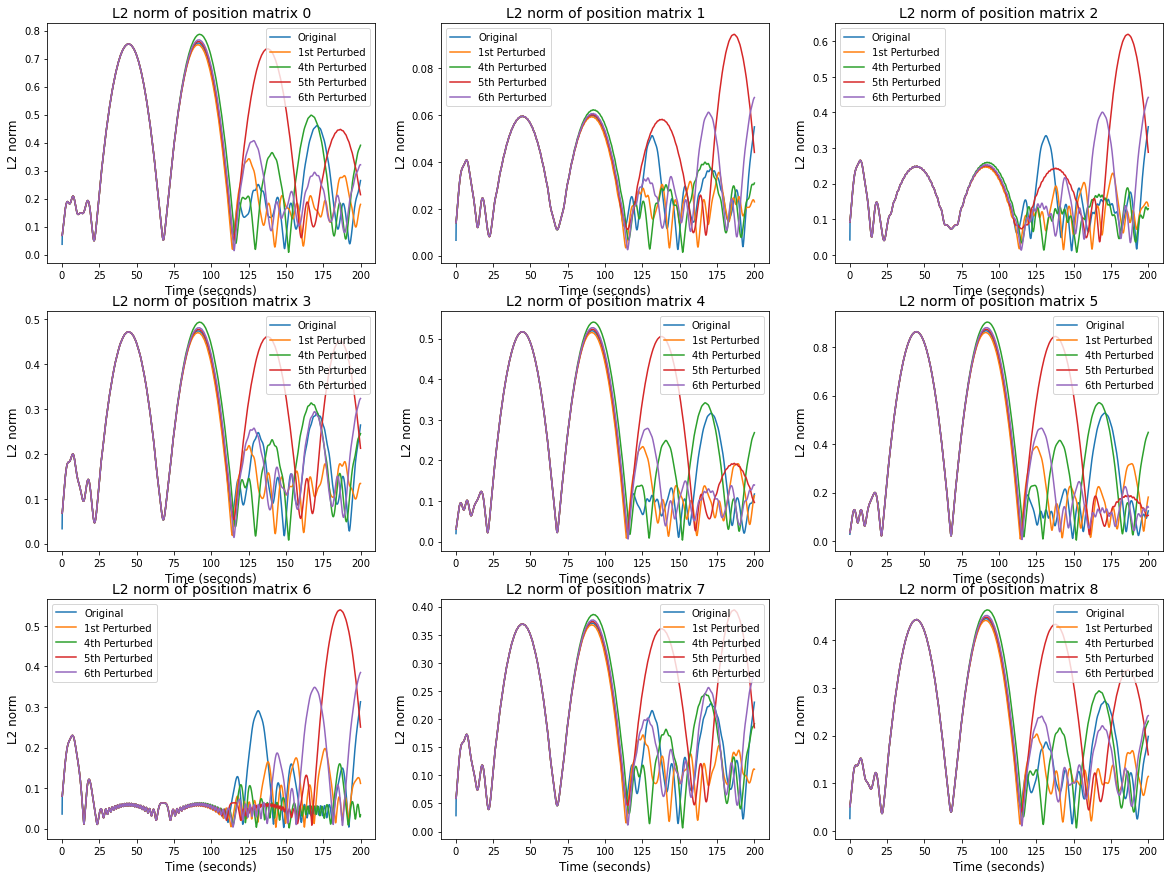

In [95]:

delta_t = 1*10**-4
record_steps = 1000
time_simulated = 200
simulation_repetitions = time_simulated/delta_t

times = np.arange(1*delta_t*record_steps, simulation_repetitions*delta_t + delta_t*record_steps , delta_t*record_steps)

plt.figure(figsize = (20,15))
for j in range(9):
    plt.subplot(3,3,j+1)
    
    X1_distance = []
    X2_perturbed_distance = []
    X4_perturbed_distance = []
    X6_perturbed_distance = []
    X8_perturbed_distance = []
    X10_perturbed_distance = []
    X12_perturbed_distance = []
    X14_perturbed_distance = []





    for i in range(len(X1_DF["X1"])-1):
        X1_distance.append(norm(X3_DF.iloc[i,j]))
        X2_perturbed_distance.append(norm(X4_DF.iloc[i,j]))
        #X4_perturbed_distance.append(norm(X5_DF.iloc[i,j]))
        #X6_perturbed_distance.append(norm(X7_DF.iloc[i,j]))
        X8_perturbed_distance.append(norm(X6_DF.iloc[i,j]))
        X10_perturbed_distance.append(norm(X8_DF.iloc[i,j]))
        X12_perturbed_distance.append(norm(X9_DF.iloc[i,j]))
        #X14_perturbed_distance.append(norm(X10_DF.iloc[i,j]))




    
    plt.plot(times,X1_distance, label = "Original")
    plt.plot(times,X2_perturbed_distance, label = "1st Perturbed")
    #plt.plot(times,X4_perturbed_distance, label = "2nd Perturbed")
    #plt.plot(times,X6_perturbed_distance, label = "3rd perturbed")
    plt.plot(times,X8_perturbed_distance, label = "4th Perturbed")
    plt.plot(times,X10_perturbed_distance, label = "5th Perturbed")
    plt.plot(times,X12_perturbed_distance, label = "6th Perturbed")
    #plt.plot(times,X14_perturbed_distance, label = "7th Perturbed")

    plt.legend()
    plt.title(f"L2 norm of position matrix {j}", fontsize = 14)
    plt.ylabel("L2 norm", fontsize = 12)
    plt.xlabel("Time (seconds)", fontsize = 12)


Velocity norms of X_simulation_2

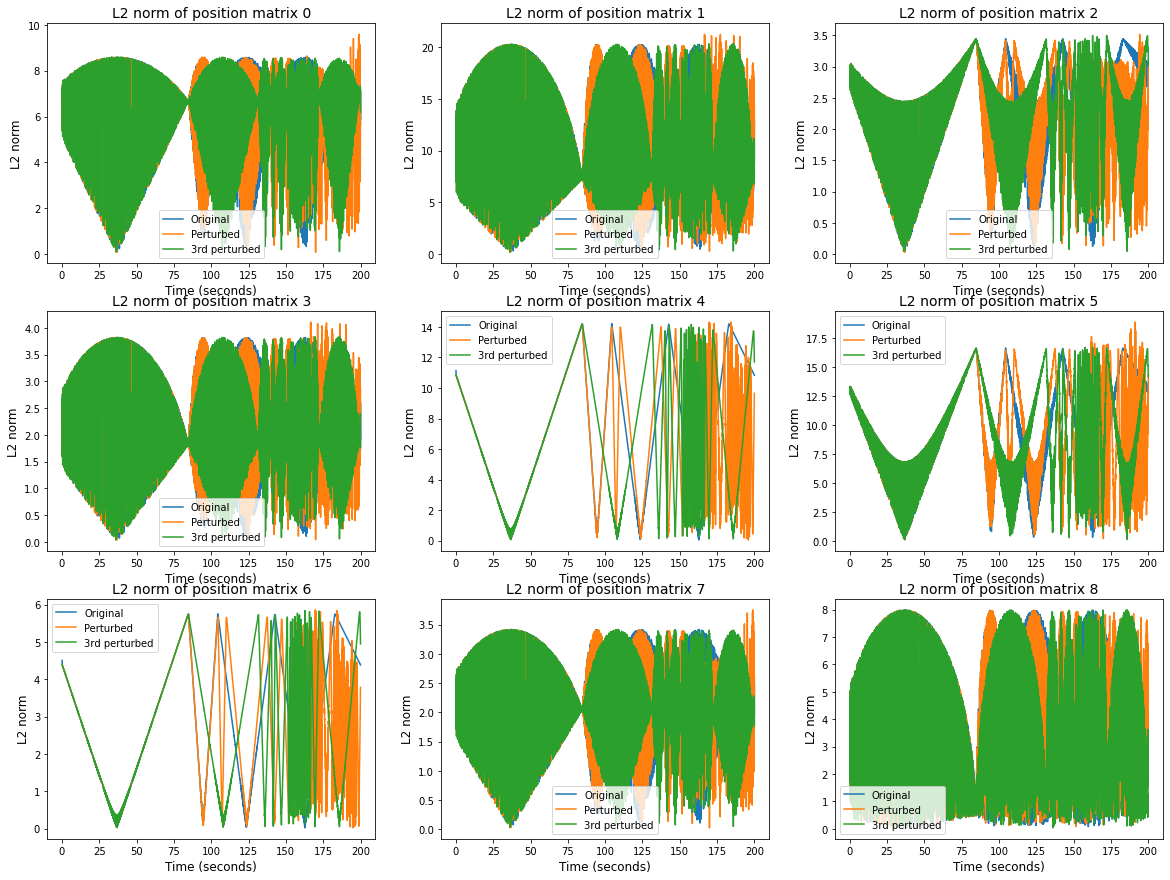

In [49]:
delta_t = 5*10**-5
record_steps = 1000
time_simulated = 200
simulation_repetitions = time_simulated/delta_t

times = np.arange(1*delta_t*record_steps, simulation_repetitions*delta_t + delta_t*record_steps , delta_t*record_steps)

plt.figure(figsize = (20,15))
for j in range(9):
    plt.subplot(3,3,j+1)
    
    X1_distance = []
    X2_perturbed_distance = []
    X4_perturbed_distance = []
    X6_perturbed_distance = []

    for i in range(len(X1_DF["X1"])-1):
        X1_distance.append(norm(V1_DF.iloc[i,j]))
        #X2_perturbed_distance.append(norm(X2_DF.iloc[i,j]))
        X4_perturbed_distance.append(norm(V2_DF.iloc[i,j]))
        X6_perturbed_distance.append(norm(V5_DF.iloc[i,j]))

    
    plt.plot(times, X1_distance, label = "Original")
    #plt.plot(times,X2_perturbed_distance, label = "1st Perturbed")
    plt.plot(times,X4_perturbed_distance, label = "Perturbed")
    plt.plot(times,X6_perturbed_distance, label = "3rd perturbed")
    plt.legend()
    plt.title(f"L2 norm of position matrix {j}", fontsize = 14)
    plt.ylabel("L2 norm", fontsize = 12)
    plt.xlabel("Time (seconds)", fontsize = 12)


Position norms of X_simulation_3.txt pickle file

NameError: name 'X3_DF' is not defined

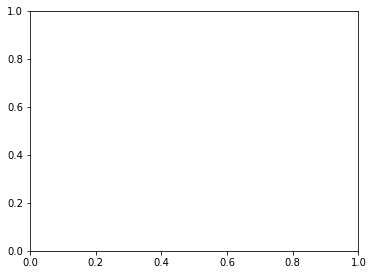

In [25]:
delta_t = 5*10**-5
record_steps = 1000
time_simulated = 100
simulation_repetitions = time_simulated/delta_t

times = np.arange(1*delta_t*record_steps, simulation_repetitions*delta_t + delta_t*record_steps , delta_t*record_steps)

plt.figure(figsize = (20,15))
for j in range(9):
    plt.subplot(3,3,j+1)
    
    X1_distance = []
    X2_perturbed_distance = []
    X4_perturbed_distance = []
    X6_perturbed_distance = []

    for i in range(len(X3_DF["X1"])-1):
        X1_distance.append(norm(X1_DF.iloc[i,j]))
        X2_perturbed_distance.append(norm(X2_DF.iloc[i,j]))
        #X4_perturbed_distance.append(norm(X3_DF.iloc[i,j]))
        X6_perturbed_distance.append(norm(X5_DF.iloc[i,j]))

    
    plt.plot(times, X1_distance, label = "Original")
    plt.plot(times,X2_perturbed_distance, label = "1st Perturbed")
    #plt.plot(times,X4_perturbed_distance, label = "2nd Perturbed")
    plt.plot(times,X6_perturbed_distance, label = "2nd perturbed")
    plt.legend()
    plt.title(f"L2 norm of position matrix {j}", fontsize = 14)
    plt.ylabel("L2 norm", fontsize = 12)
    plt.xlabel("Time (seconds)", fontsize = 12)


Velocity norms of V_simulation_9

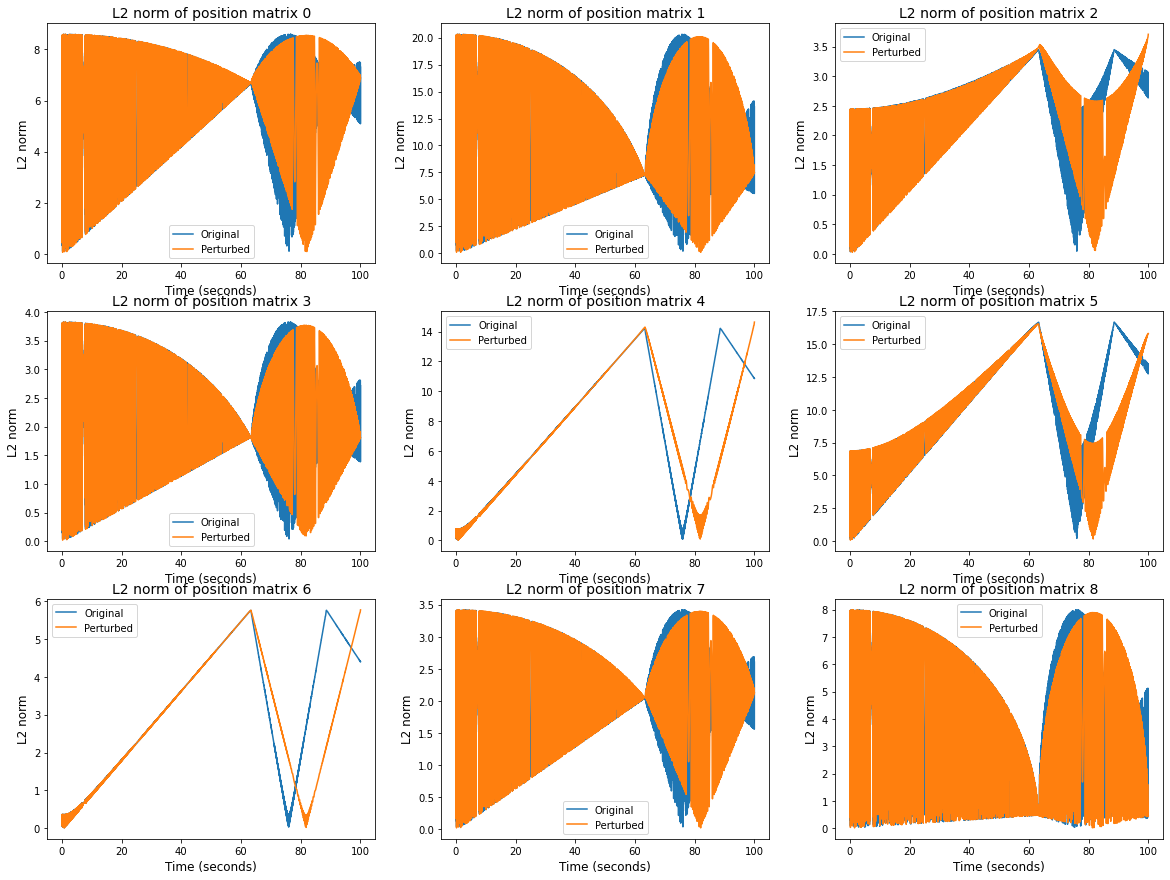

In [123]:
delta_t = 1*10**-5
record_steps = 1000
time_simulated = 100
simulation_repetitions = time_simulated/delta_t

times = np.arange(2*delta_t*record_steps, simulation_repetitions*delta_t + delta_t*record_steps , delta_t*record_steps)

plt.figure(figsize = (20,15))
for j in range(9):
    plt.subplot(3,3,j+1)
    
    X1_distance = []
    X2_perturbed_distance = []
    X4_perturbed_distance = []
    X6_perturbed_distance = []

    for i in range(len(V9_DF["V1"])-1):
        X1_distance.append(norm(V9_DF.iloc[i,j]))
        #X2_perturbed_distance.append(norm(X2_DF.iloc[i,j]))
        X4_perturbed_distance.append(norm(V10_DF.iloc[i,j]))
        #X6_perturbed_distance.append(norm(X6_DF.iloc[i,j]))

    
    plt.plot(times, X1_distance, label = "Original")
    #plt.plot(times,X2_perturbed_distance, label = "1st Perturbed")
    plt.plot(times,X4_perturbed_distance, label = "Perturbed")
    #plt.plot(times,X6_perturbed_distance, label = "3rd perturbed")
    plt.legend()
    plt.title(f"L2 norm of position matrix {j}", fontsize = 14)
    plt.ylabel("L2 norm", fontsize = 12)
    plt.xlabel("Time (seconds)", fontsize = 12)


**Using paper's separation formula**

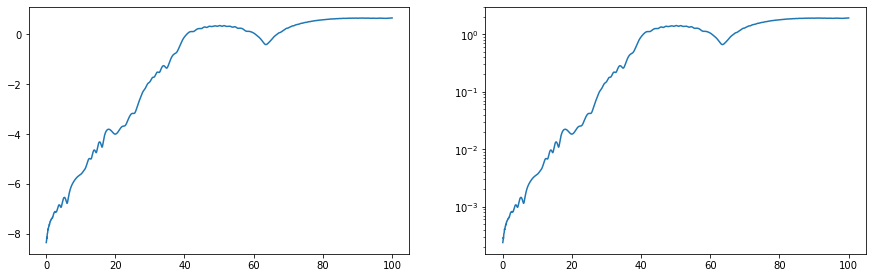

In [27]:
delta_t = 5*10**-5
record_steps = 1000
time_simulated = 100
simulation_repetitions = time_simulated/delta_t
times = np.arange(delta_t*record_steps, simulation_repetitions*delta_t + delta_t*record_steps , delta_t*record_steps)

plt.figure(figsize = (15,10))
X1_distance = []
for i in range(len(X1_DF["X1"])-1):
    sumX = 0
    for j in range(9):
        deltaX = np.array(X1_DF.iloc[i+1,j])-np.array(X2_DF.iloc[i+1,j])

        argument = np.trace( deltaX**2 )

        sumX += argument
    X1_distance.append(np.sqrt(sumX))
plt.subplot(2,2,1)
plt.plot(times, np.log(np.sqrt(X1_distance)))
plt.ylabel("Lyapunov exponent", fontsize = 11)
plt.xlabel("time seconds", fontsize = 11)
plt.title("Lyapunov exponent graph. H = 0.010539", fontsize = 11)

#plt.plot(times, np.log(np.sqrt(X1_distance)))


X1_distance = []
for i in range(len(X1_DF["X1"])-1):
    sumX = 0
    for j in range(9):
        deltaX = np.array(X1_DF.iloc[i+1,j])-np.array(X2_DF.iloc[i+1,j])

        argument = np.trace( deltaX**2 )

        sumX += argument
    X1_distance.append(np.sqrt(sumX))
plt.subplot(2,2,2)

plt.plot(times, (np.sqrt(X1_distance)))
plt.yscale("log")
plt.savefig("Run 2", dpi  = 1000)






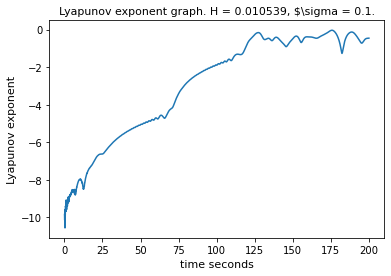

In [38]:
delta_t = 1*10**-4
record_steps = 1000
time_simulated = 200
simulation_repetitions = time_simulated/delta_t
times = np.arange(delta_t*record_steps, simulation_repetitions*delta_t + delta_t*record_steps , delta_t*record_steps)
X1_distance = []
for i in range(len(X1_DF["X1"])-1):
    sumX = 0
    for j in range(9):
        deltaX = np.array(X3_DF.iloc[i+1,j])-np.array(X4_DF.iloc[i+1,j])

        argument = np.trace( deltaX**2 )

        sumX += argument
    X1_distance.append(np.sqrt(sumX))
plt.plot(times, np.log(np.sqrt(X1_distance)))
plt.ylabel("Lyapunov exponent", fontsize = 11)
plt.xlabel("time seconds", fontsize = 11)
plt.title("Lyapunov exponent graph. H = 0.010539, $\sigma = 0.1.", fontsize = 11)
plt.savefig("Run 3", dpi = 100)

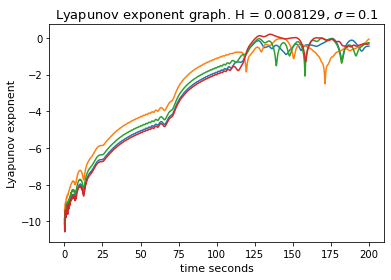

In [139]:
delta_t = 1*10**-4
record_steps = 1000
time_simulated = 200
simulation_repetitions = time_simulated/delta_t
times = np.arange(delta_t*record_steps, simulation_repetitions*delta_t + delta_t*record_steps , delta_t*record_steps)
X1_distance = []
for i in range(len(X3_DF["X1"])-1):
    sumX = 0
    for j in range(9):
        deltaX = np.array(X3_DF.iloc[i+1,j])-np.array(X4_DF.iloc[i+1,j])

        argument = np.trace( deltaX**2 )

        sumX += argument
    X1_distance.append(np.sqrt(sumX))
plt.plot(times, np.log(np.sqrt(X1_distance)))
plt.ylabel("Lyapunov exponent", fontsize = 11)
plt.xlabel("time seconds", fontsize = 11)
plt.title("Lyapunov exponent graph. H = 0.010539, $\sigma = 0.1.", fontsize = 11)
plt.savefig("Run 3", dpi = 100)


X3_distance = []
for i in range(len(X3_DF["X1"])-1):
    sumX = 0
    for j in range(9):
        deltaX = np.array(X3_DF.iloc[i+1,j])-np.array(X6_DF.iloc[i+1,j])

        argument = np.trace( deltaX**2 )

        sumX += argument
    X3_distance.append(np.sqrt(sumX))
plt.plot(times, np.log(np.sqrt(X3_distance)))
plt.ylabel("Lyapunov exponent", fontsize = 11)
plt.xlabel("time seconds", fontsize = 11)
plt.title("Lyapunov exponent graph. H = 0.010539, $\sigma = 0.1.", fontsize = 11)
plt.savefig("Run 3", dpi = 100)

X4_distance = []
for i in range(len(X3_DF["X1"])-1):
    sumX = 0
    for j in range(9):
        deltaX = np.array(X3_DF.iloc[i+1,j])-np.array(X9_DF.iloc[i+1,j])

        argument = np.trace( deltaX**2 )

        sumX += argument
    X4_distance.append(np.sqrt(sumX))
plt.plot(times, np.log(np.sqrt(X4_distance)))
plt.ylabel("Lyapunov exponent", fontsize = 11)
plt.xlabel("time seconds", fontsize = 11)
plt.title("Lyapunov exponent graph. H = 0.008129, $\sigma = 0.1.", fontsize = 11)
plt.savefig("Run 3", dpi = 100)

X5_distance = []
for i in range(len(X3_DF["X1"])-1):
    sumX = 0
    for j in range(9):
        deltaX = np.array(X3_DF.iloc[i+1,j])-np.array(X8_DF.iloc[i+1,j])

        argument = np.trace( deltaX**2 )

        sumX += argument
    X5_distance.append(np.sqrt(sumX))
plt.plot(times, np.log(np.sqrt(X5_distance)))
plt.ylabel("Lyapunov exponent", fontsize = 11)
plt.xlabel("time seconds", fontsize = 11)
plt.title("Lyapunov exponent graph. H = 0.008129, $\sigma = 0.1.$", fontsize = 13)
plt.savefig("Run 3", dpi = 100)

-0.6024932596436223
-0.44257583134158535


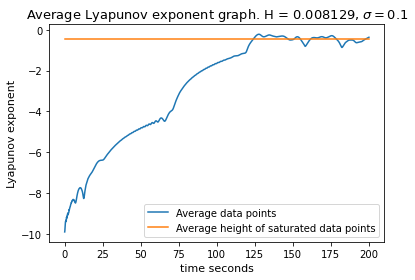

In [138]:
Xaverage_distance = []

for i in range(len(X3_DF["X1"])-1):
    average = (X1_distance[i] + X5_distance[i] + X3_distance[i]+ X4_distance[i]) /5
    Xaverage_distance.append(average)
print(np.log(np.sqrt(np.array(Xaverage_distance[1600]))))
# Average height from t = 125 s onwards
print(np.sum(np.log(np.sqrt(np.array(Xaverage_distance[1250:])))/len(Xaverage_distance[1250:])))
    
plt.plot(times, np.log(np.sqrt(Xaverage_distance)))
plt.plot([0,200],[-0.44257583134158535 ,-0.44257583134158535])
plt.ylabel("Lyapunov exponent", fontsize = 11)
plt.xlabel("time seconds", fontsize = 11)
plt.title("Average Lyapunov exponent graph. H = 0.008129, $\sigma = 0.1.$", fontsize = 13)
plt.legend(["Average data points","Average height of saturated data points"])
plt.savefig("Run 3 average", dpi = 100)

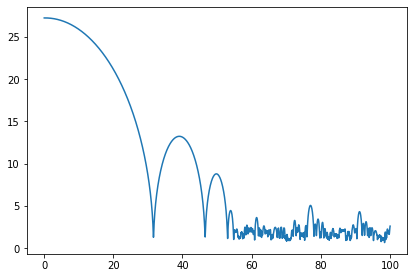

In [138]:
delta_t = 5*10**-5
record_steps = 1000
time_simulated = 200
simulation_repetitions = time_simulated/delta_t

times = np.arange(1*delta_t*record_steps, simulation_repetitions*delta_t + delta_t*record_steps , delta_t*record_steps)


plt.figure(figsize = (15,10))
X1_distance = []
for i in range(len(X2_DF["X1"])-1):
    sumX = 0
    for j in range(9):
        deltaX = np.array(X6_DF.iloc[i+1,j])
        argument = np.trace( deltaX**2 )

        sumX += argument
    X1_distance.append(np.sqrt(sumX))
plt.subplot(2,2,1)
plt.plot(times, (np.sqrt(X1_distance)))
